(102400, 4)
[11/12/2023-17:48:14] [W] * GPU compute time is unstable, with coefficient of variance = 3.64576%.
[11/12/2023-17:48:14] [W]   If not already in use, locking GPU clock frequency or adding --useSpinWait may improve the stability.
[0.154239   0.3197213  0.02578839 ... 0.76849025 0.00538539 0.09178409]
[[1.5423900e-01 3.1972131e-01 2.5788395e-02 1.0704024e-01]
 [5.0000000e-01 3.1972131e-01 2.5788395e-02 1.0704024e-01]
 [1.0000000e+00 3.1972131e-01 2.5788395e-02 1.0704024e-01]
 ...
 [4.8500000e+01 7.6849025e-01 5.3853886e-03 9.1784090e-02]
 [4.9000000e+01 7.6849025e-01 5.3853886e-03 9.1784090e-02]
 [4.9500000e+01 7.6849025e-01 5.3853886e-03 9.1784090e-02]]
[[ 0.4404297   0.02197266]
 [ 0.8564453   0.0309906 ]
 [ 1.1005859   0.05169678]
 ...
 [-0.15942383  0.12194824]
 [-0.1459961   0.11694336]
 [-0.09814453  0.11132812]]
21777 {'startEnqMs': 201.749, 'endEnqMs': 201.778, 'startH2dMs': 199.875, 'endH2dMs': 199.958, 'startComputeMs': 200.056, 'endComputeMs': 200.191, 'startD2hMs'

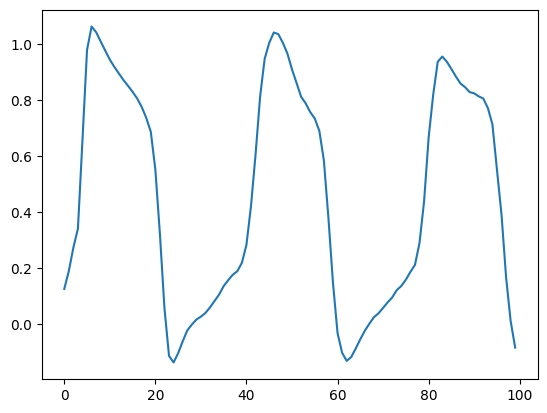

In [97]:
import numpy as np

# Assuming the shape is known (replace rows and columns with actual values)
rows = 102400
columns =2
dt=np.float32

print(np.shape(c))

with open('inp', 'wb') as file:
    np.array(c,dtype=dt).tofile(file)
    
!trtexec --loadEngine=model.trt --loadInputs=input:"inp"  --dumpRawBindingsToFile --exportTimes="r.json" --avgRuns=50 --duration=5 1>/dev/null
# Read the data with the known shape and data type (float32 in this case)
with open('input.input.102400.4.Float.raw', 'rb') as file:
    raw_data = np.fromfile(file, dtype=dt)
    print(raw_data)
    shaped_data = raw_data.reshape(rows, 4)
    print(shaped_data)
# Read the data with the known shape and data type (float32 in this case)
with open('output.output.102400.2.Float.raw', 'rb') as file:
    raw_data = np.fromfile(file, dtype=dt)
    shaped_data = raw_data.reshape(rows, 2)
    print(shaped_data)
    
plt.plot(shaped_data.T[0][100:200])


import json



# Read the content of the JSON file
with open('r.json', 'r') as file:
    data = json.load(file)

    
print(len(data),data[0])
computetimes=[data[x]['computeMs'] for x in range(len(data))]
latencytimes=[data[x]['latencyMs'] for x in range(len(data))]

compute_min = min(computetimes)
compute_max = max(computetimes)
compute_avg = sum(computetimes) / len(computetimes)

latency_min = min(latencytimes)
latency_max = max(latencytimes)
latency_avg = sum(latencytimes) / len(latencytimes)

print(f"Compute Times - Min: {compute_min}, Max: {compute_max}, Average: {compute_avg}")
print(f"Latency Times - Min: {latency_min}, Max: {latency_max}, Average: {latency_avg}")

In [2]:
!ls

10.100.40k.40k.json	   fhn1P.py
FHN1P_PLOTTER-Copy1.ipynb  fig1.png
FHN1P_PLOTTER.ipynb	   input.input.102400.4.Float.raw
FHNCUDAlib.py		   model.onnx
Untitled.ipynb		   model.trt
Untitled1.ipynb		   modela.onnx
Untitled2.ipynb		   nano.save
Untitled3.ipynb		   network.0.pth
Untitled4.ipynb		   network.0.ptha
Untitled5.ipynb		   novo
Untitled6.ipynb		   output.output.102400.2.Float.raw
__pycache__		   outputs
a			   pred-Copy1.ipynb
a.out			   pred-Copy2.ipynb
a.pt			   pred-Copy3.ipynb
a.pth			   pred-sembatch.ipynb
aa.png			   pred.ipynb
ab.png			   pred_rascunho.ipynb
b.out			   prof.html
conf			   prof10k.html
config.yaml		   resnet_engine_intro.trt
cuda-old.cu		   super_resolution.onnx
cuda.cu			   train.ipynb
data			   u.csv
deploy_inferencea	   untitled.txt
dynamic-shapes.ipynb	   v.py
eg.trt			   x1P.png


In [ ]:
import numpy as np
import time as TIME
import torch_tensorrt
from FHNCUDAlib import FHNCUDA
import numpy as np
import matplotlib.pyplot as plt
import chaospy as cp
from itertools import product


def runCuda(T=1024):
    # Define the ranges
    krange = [0.08, 0.12]
    vrange = [0.0, 0.12]
    urange = [0.0, 0.8]
        # Create uniform distributions
    k_dist = cp.Uniform(*krange)
    v_dist = cp.Uniform(*vrange)
    u_dist = cp.Uniform(*urange)

    joint_dist = cp.J(u_dist,v_dist,k_dist)
    print(T)
    sample_set = joint_dist.sample(T, rule="L").T
    np.random.shuffle(sample_set)
    sample_set=sample_set





    x0=np.array(sample_set)



    print(np.shape(x0))
    dt,tt=0.01,50

    rate=50

    print("-------------------------CUDAref----------------------------")

    ###Cuda run
    start_time = TIME.time()
    u,v ,t,p=FHNCUDA.run(x0,tt,dt*0.1,rate*10)
    cudatime = TIME.time()- start_time

    u_ref=np.array(u).flatten()
    print("Shape cudapred ",np.shape(u))

    print("-------------------------CUDA ----------------------------")

    ###Cuda run
    start_time = TIME.time()
    u,v ,t,p=FHNCUDA.run(x0,tt,dt,rate)
    cudatime = TIME.time()- start_time

    u_num=np.array(u).flatten()
    print("Shape cudapred ",np.shape(u))

    #print(np.unique(t))
    p=[i/1000 for i in p[0]]
    print("cuda time",p)
    print("Error Calculation")
    e=((u_ref-u_num)**2)**(1/2)
    print("mean",np.mean(e))
    m=np.max(e)
    print("max",m)
    #plt.plot(u_ref[:100],"b")
    #plt.plot(u_num[:100],"r")

    #plt.show()

    t=np.array(t).flatten()
    #print(np.shape(t))

    
    #print(t)
    param_list = []

    for sample in sample_set:
        u,v,k=sample
        for T in t:
                        param_list.append([T,u,v,k])




    x0=np.array(param_list)
    return p,x0,u_ref
    #print(x0)
    #print(x0)
t,c,y=runCuda(57671)
print(t)

In [6]:
y

array([ 0.722939,  1.042264,  1.037733, ..., -0.076462, -0.05806 ,
       -0.039856])

In [7]:
c

array([[0.00000000e+00, 7.22938812e-01, 4.62583974e-02, 9.73334703e-02],
       [5.00000000e-01, 7.22938812e-01, 4.62583974e-02, 9.73334703e-02],
       [1.00000000e+00, 7.22938812e-01, 4.62583974e-02, 9.73334703e-02],
       ...,
       [4.85000000e+01, 2.92569182e-01, 4.18197019e-02, 9.15817538e-02],
       [4.90000000e+01, 2.92569182e-01, 4.18197019e-02, 9.15817538e-02],
       [4.95000000e+01, 2.92569182e-01, 4.18197019e-02, 9.15817538e-02]])